In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCountry.csv
GlobalLandTemperaturesByMajorCity.csv
GlobalLandTemperaturesByState.csv
GlobalTemperatures.csv



### Is The Temperature Really Rising??

In [23]:
global1=pd.read_csv('../input/GlobalTemperatures.csv')
global1=global1[['dt','LandAverageTemperature']]
global1.dropna(inplace=True)
global1['dt']=pd.to_datetime(global1.dt).dt.strftime('%d/%m/%Y')
global1['dt']=global1['dt'].apply(lambda x:x[6:])
global1=global1.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()
trace=go.Scatter(
    x=global1['dt'],
    y=global1['LandAverageTemperature'],
    mode='lines',
    )
data=[trace]

py.iplot(data, filename='line-mode')

### Let's Compare for any 2 months

In [24]:
global2=pd.read_csv('../input/GlobalTemperatures.csv')
global2=global2[['dt','LandAverageTemperature']]
global2.dropna(inplace=True)
global2['dt']=pd.to_datetime(global2.dt).dt.strftime('%d/%m/%Y')
global2['month']=global2['dt'].apply(lambda x:x[3:5])
global2['year']=global2['dt'].apply(lambda x:x[6:])
global2=global2[['month','year','LandAverageTemperature']]
global2['month']=global2['month'].map({'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'})
def plot_month(month1,month2):
    a=global2[global2['month']==month1]
    b=global2[global2['month']==month2]
    trace0 = go.Scatter(
    x = a['year'],
    y = a['LandAverageTemperature'],
    mode = 'lines',
    name = month1
    )
    
    trace1 = go.Scatter(
    x = b['year'],
    y = b['LandAverageTemperature'],
    mode = 'lines',
    name = month2
    )
    data = [trace0,trace1]
    py.iplot(data, filename='line-mode')
plot_month('Aug','Nov')

We see a similar trend for the months also. There is a continous increase in the temperatures in individual months too. We can check for any two months by just replacing the month names in the function.

### Average Temperature By Country (Interactive Map)

In [25]:
temp_country=pd.read_csv('../input/GlobalLandTemperaturesByCountry.csv')

In [ ]:
temp_country['Country'].replace({'Denmark (Europe)':'Denmark','France (Europe)':'France','Netherlands (Europe)':'Netherlands','United Kingdom (Europe)':'Europe'},inplace=True)
temp_country.fillna(0,inplace=True)

In [26]:
temp_country1=temp_country.groupby(['Country'])['AverageTemperature'].mean().reset_index()

### Top 10 Hottest And Coldest Countries

Text(0, 0.5, 'Country')

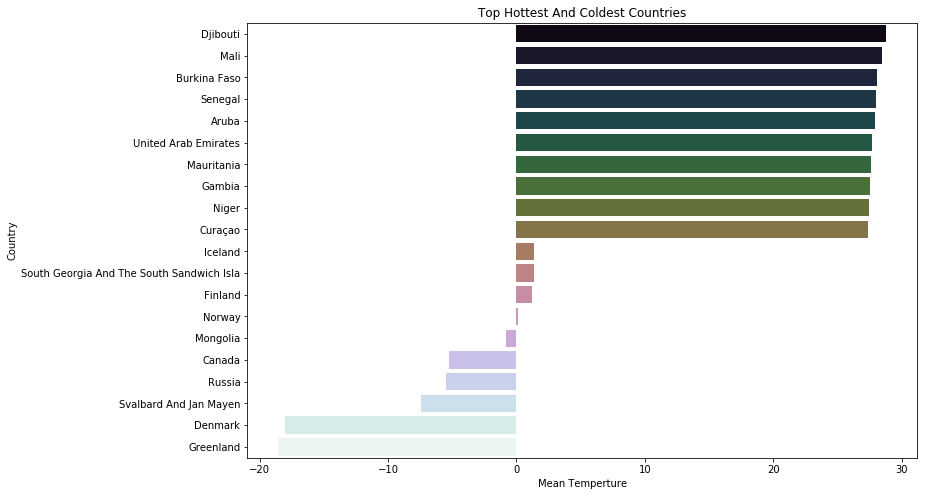

In [27]:
hot=temp_country1.sort_values(by='AverageTemperature',ascending=False)[:10]
cold=temp_country1.sort_values(by='AverageTemperature',ascending=True)[:10]
top_countries=pd.concat([hot,cold])
top_countries.sort_values('AverageTemperature',ascending=False,inplace=True)
f,ax=plt.subplots(figsize=(12,8))
sns.barplot(y='Country',x='AverageTemperature',data=top_countries,palette='cubehelix',ax=ax).set_title('Top Hottest And Coldest Countries')
plt.xlabel('Mean Temperture')
plt.ylabel('Country')

### Trend In Temperatures for the Top Economies

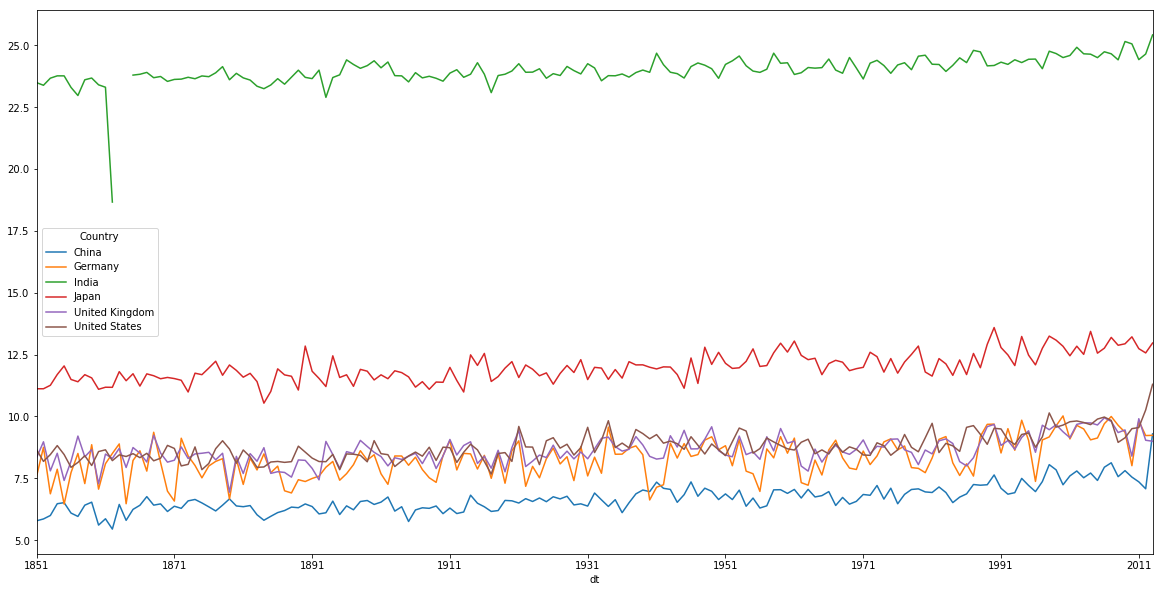

In [28]:
countries=temp_country.copy()
countries['dt']=pd.to_datetime(countries.dt).dt.strftime('%d/%m/%Y')
countries['dt']=countries['dt'].apply(lambda x: x[6:])
countries=countries[countries['AverageTemperature']!=0]
countries.drop('AverageTemperatureUncertainty',axis=1,inplace=True)
li=['United States','China','India','Japan','Germany','United Kingdom']
countries=countries[countries['Country'].isin(li)]
countries=countries.groupby(['Country','dt'])['AverageTemperature'].mean().reset_index()
countries=countries[countries['dt'].astype(int)>1850]
abc=countries.pivot('dt','Country','AverageTemperature')
f,ax=plt.subplots(figsize=(20,10))
abc.plot(ax=ax)

### Maximum Temperature Differences

### Temperature Difference By Country

In [29]:
try2=try2.merge(df,left_on='Country',right_on='Country',how='left')
try2.dropna(inplace=True)

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = try2['Code'],
        z = try2['difference'],
        locationmode = 'Code',
        text = try2['Country'].unique(),
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Temperature Difference')
            )
       ]

layout = dict(
    title = 'Temperature Difference By Country',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'Mercator',
            
        ),
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

TypeError: only integer scalar arrays can be converted to a scalar index

The above geomap shows the difference between the maximum and minimum temperatures for each country.

### Temperatures By States

In [30]:
states=pd.read_csv('../input/GlobalLandTemperaturesByState.csv')
states.dropna(inplace=True)
states['dt']=pd.to_datetime(states.dt).dt.strftime('%d/%m/%Y')

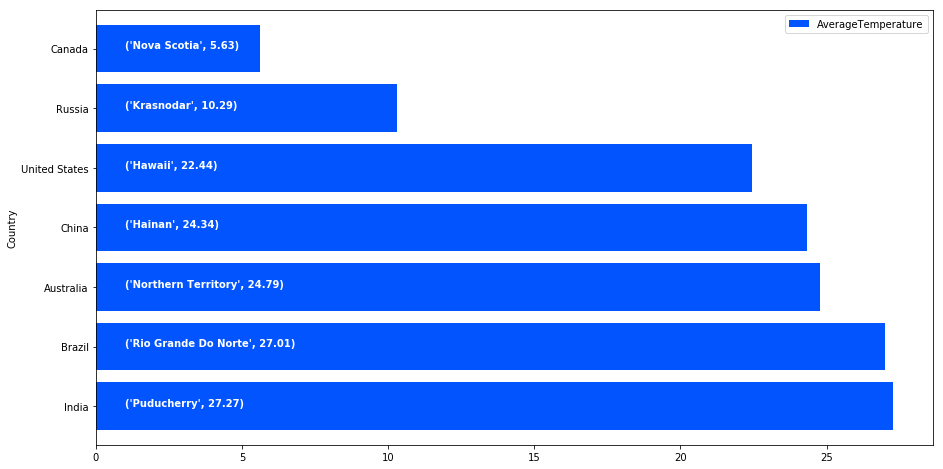

In [31]:
f,ax=plt.subplots(figsize=(15,8))
top_states=states.groupby(['State','Country'])['AverageTemperature'].mean().reset_index().sort_values(by='AverageTemperature',ascending=False)
top_states=top_states.drop_duplicates(subset='Country',keep='first')
top_states.set_index('Country',inplace=True)
top_states['AverageTemperature']=top_states['AverageTemperature'].round(decimals=2)
top_states.plot.barh(width=0.8,color='#0154ff',ax=ax)
for i, p in enumerate(zip(top_states.State, top_states['AverageTemperature'])):
    plt.text(s=p,x=1,y=i,fontweight='bold',color='white')


### Temperature Trends in Hottest States

Text(0.5, 0, 'Year')

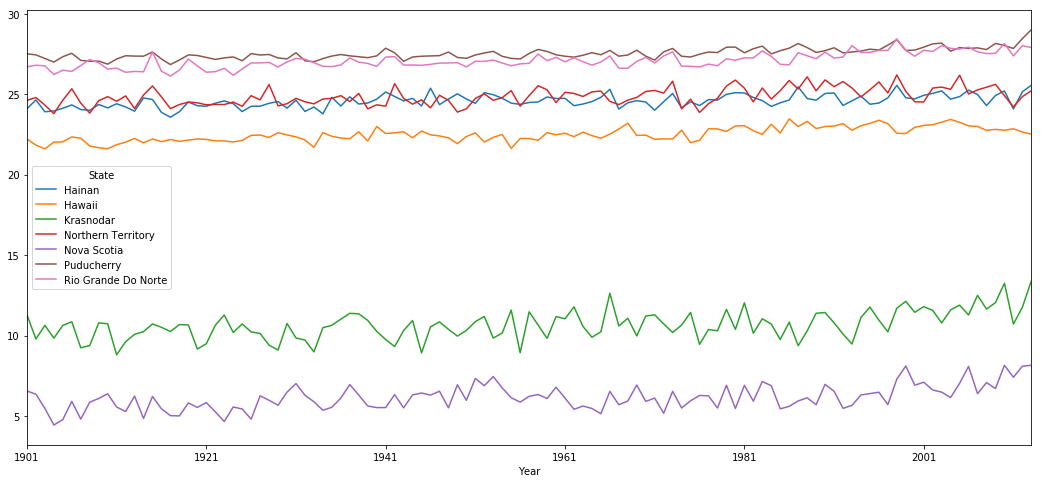

In [32]:
top_states1=states.copy()
top_states1['dt']=top_states1['dt'].apply(lambda x:x[6:])
top_states1=top_states1[top_states1['State'].isin(list(top_states.State))]
top_states1=top_states1.groupby(['State','dt'])['AverageTemperature'].mean().reset_index()
top_states1=top_states1[top_states1['dt'].astype(int)>1900]
f,ax=plt.subplots(figsize=(18,8))
top_states1.pivot('dt','State','AverageTemperature').plot(ax=ax)
plt.xlabel('Year')

### Temperatures By Cities

In [33]:
cities=pd.read_csv('../input/GlobalLandTemperaturesByCity.csv')
cities.dropna(inplace=True)
cities['year']=cities['dt'].apply(lambda x: x[:4])
cities['month']=cities['dt'].apply(lambda x: x[5:7])
cities.drop('dt',axis=1,inplace=True)
cities=cities[['year','month','AverageTemperature','City','Country','Latitude','Longitude']]
cities['Latitude']=cities['Latitude'].str.strip('N')
cities['Longitude']=cities['Longitude'].str.strip('E')
cities.head()

,year,month,AverageTemperature,City,Country,Latitude,Longitude
0,1743,11,6.068,Århus,Denmark,57.05,10.33
5,1744,04,5.788,Århus,Denmark,57.05,10.33
6,1744,05,10.644,Århus,Denmark,57.05,10.33
7,1744,06,14.051,Århus,Denmark,57.05,10.33
8,1744,07,16.082,Århus,Denmark,57.05,10.33


### Hottest Cities By Country

Text(0.5, 0, 'Average Temperature')

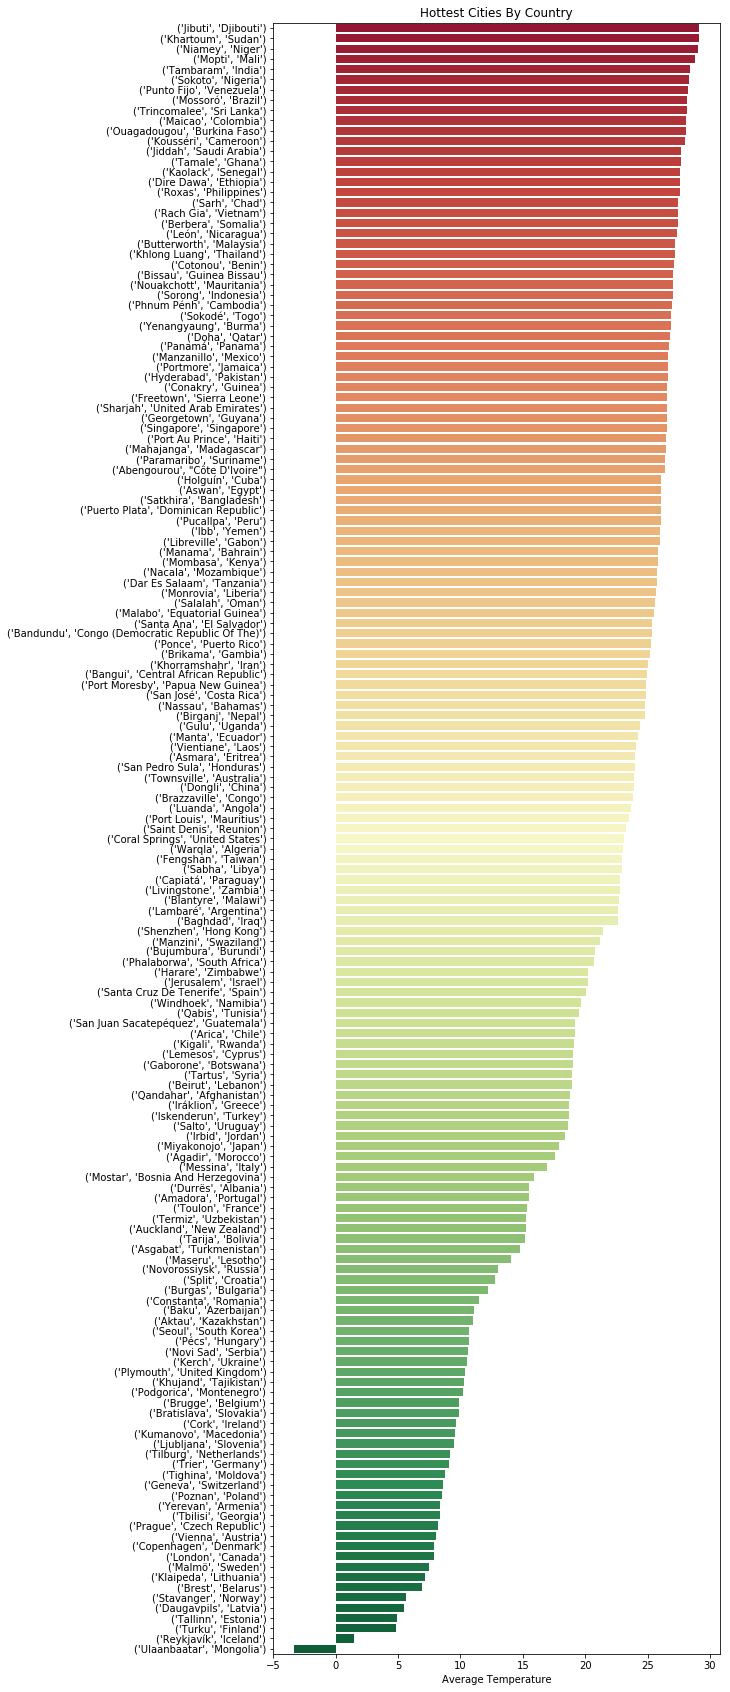

In [34]:
temp_city=cities.groupby(['City','Country'])['AverageTemperature'].mean().reset_index().sort_values(by='AverageTemperature',ascending=False)
temp_city=temp_city.drop_duplicates(subset='Country',keep='first')
temp_city=temp_city.set_index(['City','Country'])
plt.subplots(figsize=(8,30))
sns.barplot(y=temp_city.index,x='AverageTemperature',data=temp_city,palette='RdYlGn').set_title('Hottest Cities By Country')
plt.xlabel('Average Temperature')

### Average Temperature Of Major Indian Cities By Month

In [35]:
indian_cities=cities[cities['Country']=='India']
indian_cities=indian_cities[indian_cities['year']>'1850']
major_cities=indian_cities[indian_cities['City'].isin(['Bombay','New Delhi','Bangalore','Hyderabad','Calcutta','Pune','Madras','Ahmadabad'])]
heatmap=major_cities.groupby(['City','month'])['AverageTemperature'].mean().reset_index()
trace = go.Heatmap(z=heatmap['AverageTemperature'],
                   x=heatmap['month'],
                   y=heatmap['City'],
                  colorscale='Viridis')
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Trends in Major Cities

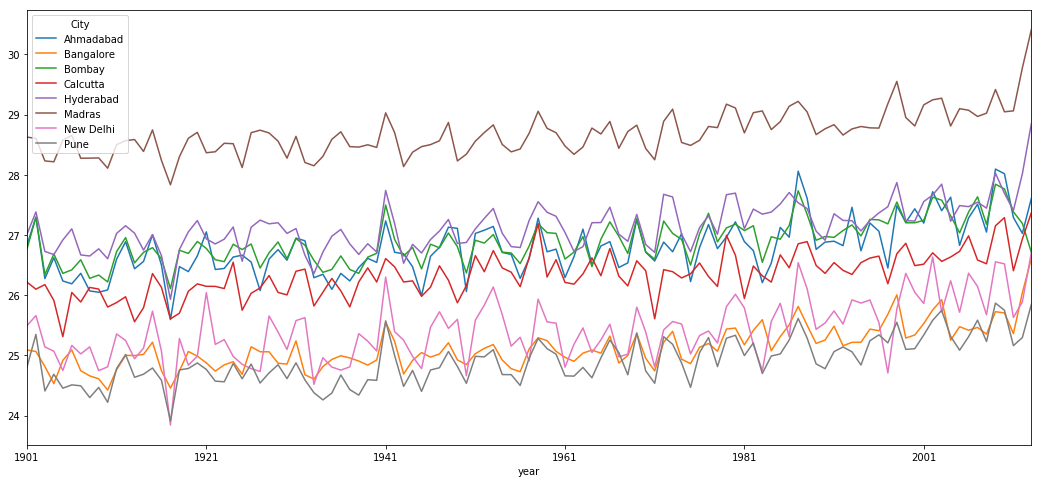

In [36]:
graph=major_cities[major_cities['year']>'1900']
graph=graph.groupby(['City','year'])['AverageTemperature'].mean().reset_index()
graph=graph.pivot('year','City','AverageTemperature').fillna(0)
graph.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)

### Indian Cities Temperatures

In [37]:
cities=indian_cities.groupby(['City'])[['AverageTemperature']].mean().reset_index()
cities=cities.merge(indian_cities,left_on='City',right_on='City',how='left')
cities=cities.drop_duplicates(subset=['City'],keep='first')
cities=cities[['City','AverageTemperature_x','Latitude','Longitude']]

## City Temperatures in India(Folium)

In [38]:
import folium
import folium.plugins
location=cities[['Latitude','Longitude']]
location=location.astype(float)
def color_point(x):
    if x>=28:
        color='red'
    elif ((x>15 and x<28)):
        color='blue'
    else:
        color='green'
    return color   
map1 = folium.Map(location=[20.59, 78.96],tiles='CartoDB dark_matter',zoom_start=4.5)
for point in location.index:
    folium.CircleMarker(list(location.loc[point].values),popup='<b>City: </b>'+str(cities.City[point]+'<br><b>Avg Temperature:</b>'+str(cities.AverageTemperature_x[point])),\
                        radius=1,color=color_point(cities.AverageTemperature_x[point])).add_to(map1)
map1

Drag the map to find more cities. Click on each point to find more information about each point.